<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Aux6_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 6 - IN6531
**Autor: Patricio Ortiz**

# A. Vector Space Model

## A.1 Introducción

Trabajar con textos no estructurados no es una tarea sencilla. En Machine Learning (ML) se trabaja con representaciones vectoriales de los datos, por tanto, necesitamos representar el  texto como un vector, lo que se conoce como **Embedding**. En minería de texto existen dos tipos de Embedding, los basados en frecuencia y en predicción (representaciones aprendidas por un modelo de ML).

Algunas palabras claves propias del mundo de minería de texto:

1. **Documento (D)**: se refiere a una observación de tipo texto. Ej: comentario, relato, email, etc.
2. **Corpus (C)**: colección de documentos, corresponde al conjunto de datos.
3. **Vocabulario (V)**: corresponde a un conjunto de términos (tokens únicos normalizados) dentro del corpus que sobrevivieron a un procesamiento.
4. **Tokenization**: dividir el texto en entidades significativa llamadas tokens, si cada token es una palabra se habla de unigrams, si cada token son pares de palabras se habla de bigrams, tres palabras son trigrams, así hasta n-grams. En términos más computines es pasar de un string a una lista de strings.
Ejemplo de unigrams:


*'Buenos días estudiantes buenos' = ['Buenos', 'diás', 'estudiantes', 'buenos']*

## A.2 VSM

Vector Space Model (VSM) es un modelo que representa un documento como un vector de términos, donde cada término es una dimensión del vector.

- Documentos con diferentes palabras y largos viven en el mismo espacio.
- Estas representaciones son además llamadas **Bag of Words** (o bolsa de palabras), donde un documento es representado por un conjunto no ordenado de sus términos.

- El valor en cada dimensión es un peso que presenta la relevancia del término $i$ del vocabulario $V$ en el documento $d$.

\begin{equation*}
d^{\rightarrow} = (w_{1}, \ldots, w_{|V|} )
\end{equation*}

- Bag-of-words no representa la semántica de los documentos, palabras que son sinónimos por ejemplo son consideradas como términos diferentes, además el orden de las palabras dentro del documento se pierde.


**Term Frequency (TF)**: También llamada Count Vector, el peso asociado a cada término del vocabulario dentro de un documento viene dado por la frecuencia del término dentro del documento ($tf_{i}$). 



**Term Frequency-Inverted Document Frequency (TF-IDF)**: Esta transformación consiste en normalizar la frecuencia de cada término  $tf_{i}$ de un documento por $idf_{i} = log(\frac{N}{n_{i}})$, donde $n_{i}$ es las veces que el término ha aparecido al menos una vez en el total de documentos y $N$ es el número de documentos, siendo el peso para el término $i$ el siguiente $w_{i}= tf_{i} \times idf_{i}$.

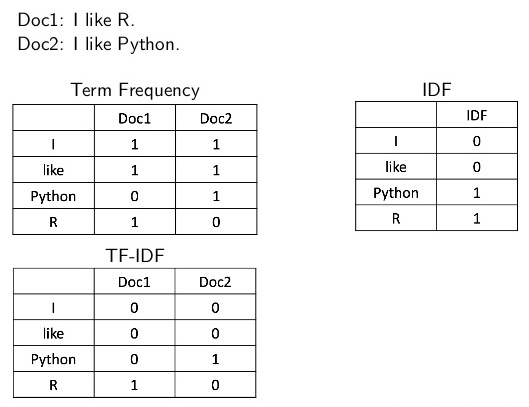

Notar que si existe un término $j$ que aparece en todos los documentos su peso es 0 pues $idf_{j}=log(\frac{N}{n_{j}})=log(\frac{N}{N}) = log(1)=0$.


## A.3 Procesamiento

El objetivo del preprocesamiento en text-mining es reducir el vocabulario, eliminando aquellas palabras irrelevantes y homologando palabras con un significado similar.
 
 Algunas técnicas que podemos aplicar para reducir el vocabulario:
 1. **Stopwords**: palabras que aportan poca información. Por ejemplo, artículos, preposiciones, conectores, etc.
 2. **Stemming**: Llevar las palabra a su raíz gramatical. Playing->play, does->do, jugar->jug.
 3. **Lemmatization**: Llevar las palabras a su lema. 
 4. **Filtrar palabras de baja frecuencia**, por ejemplo menor a 10.
 5. **Filtrar palabras con alta frecuencia** (stopwords contextuales), por ejemplo aquellas palabras que aparecen en todos los documento. En este caso una transformación TF-IDF genera una columna de ceros, esto implica nula o poca heterogeneidad por ende eliminar.
 6. Usar **técnicas de selección de atributos**.
 
 
Otras prácticas de procesamiento que se suelen aplicar:
1. Eliminar caracteres no alfa-numéricos: @\_\#\%\$/(?
2. Corrección de Ortografía. Las palabras con mala ortografía suelen tener baja frecuencia.
3. Eliminar números, urls, correos (depende del contexto).
4. Identificar palabras claves de ser necesario, por ejemplo, "Juegos Olímpicos" debiese ser considerado como un token.
5. Llevar las letras a minúsculas.

## A.4 Aplicación


La base de datos consiste de 5 conjuntos de noticias extraídas de la radio biobio. 
Cada conjunto de noticias contiene 200 documentos (noticias) y tiene asociado una categoría en {nacional, internacional, economía, sociedad, opinion}.

### Importar los datos

In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Patortiz26/IN6531-Miner-a-de-datos-2021-2/main/news_biobio.csv', index_col=0)
df.head()

,author,author_link,category,content,embedded_links,link,publication_date,publication_hour,subcategory,tags,title
0,Gonzalo Cifuentes,/lista/autores/gcifuentes,Nacional,Alumnos de Ingeniería de la Universidad Cató...,[],https://www.biobiochile.cl/noticias/nacional/c...,05/08/2019,10:50,Nacional,"['#Chile', '#Ingeniería UC', '#LightWash', '#L...",¿Lavar la ropa con luz?: invento de chilenos e...
1,Felipe Delgado,/lista/autores/fdelgado,Nacional,Alrededor de 40 mil hogares de las comunas d...,[],https://www.biobiochile.cl/noticias/nacional/r...,05/08/2019,07:51,Región Metropolitana,"['#Pirque', '#Puente Alto', '#Región Metropoli...","Alrededor de 40 mil hogares de Puente Alto, Pi..."
2,Nicolás Parra,/lista/autores/nparra,Nacional,Quien fuera el director de la Compin Bío Bío...,['https://media.biobiochile.cl/wp-content/uplo...,https://www.biobiochile.cl/noticias/nacional/r...,05/08/2019,08:14,Región del Bío Bío,"['#Compin', '#Concepción', '#Licencia', '#Regi...",Habla director de Compin Bío Bío que se autoap...
3,Catalina Díaz,/lista/autores/catalinadiaz,Nacional,Seis damnificados es el saldo de un incendio...,['https://media.biobiochile.cl/wp-content/uplo...,https://www.biobiochile.cl/noticias/nacional/r...,05/08/2019,08:19,Región de los Ríos,"['#Bomberos', '#Damnificados', '#Daños', '#Inc...",6 damnificados dejó incendio que destruyó una ...
4,Catalina Díaz,/lista/autores/catalinadiaz,Nacional,Con arresto domiciliario total quedó el adol...,['https://media.biobiochile.cl/wp-content/uplo...,https://www.biobiochile.cl/noticias/nacional/r...,05/08/2019,08:27,Región de los Lagos,"['#Arresto Domiciliario', '#Bullying', '#Calbu...",Con arresto domiciliario quedó menor detenido ...


### Función de tokenización

In [ ]:
!pip install --upgrade spacy
!python -m spacy download es_core_news_sm

In [29]:
# expresiones regulares
import re
# librería de nlp
import spacy
#importar set de stopwords
from spacy.lang.es.stop_words import STOP_WORDS 
#importar stemmer
from nltk.stem import SnowballStemmer 
# crear objeto para aplicar lematización (descomentar las lineas debajo la primera vez)
# !pip install --upgrade spacy
# !python -m spacy download es_core_news_sm
nlp = spacy.load('es_core_news_sm')

def tokenizer(doc, sep=None, stopwords_remove =False, lemmatization=False, stemming = False, vocabulary=None):
    '''
    Función de tokenización. Por defecto divide la sentencia por el carácter espacio.
    Ej: 'Data Mining is the best course'->['Data',  'Mining', 'is', 'the', 'best', 'course']
    
    Parameters
    ----------
    doc: str 
        documento.
    sep: str 
        carácter para dividir el documento en tokens, por defecto es el espacio.
    stopwords_remove: bool
        si es True remueve los stopwords del documento.
    lemmatization: bool
        si es True lleva las palabras a su lema.
    stemming: bool
        si es True lleva las palabas a su raíz.
    vocabuary: list
        si un vocabulario es dado filtra las palabras que no estan presentes en el.
    
    Return
    -------
    tokens: list
        lista de tokens.
    '''
    #elimina los símbolos de puntuación excepto underscore
    doc = re.sub(r'[^\w\s]','', doc) 
    #elimina los caracteres que contienen letras y números
    doc = re.sub(r'[a-zA-Z]+[0-9]+', '', doc) 
    #elimina los caracteres numéricos
    doc = re.sub(r'[0-9]+', ' ', doc) 
    #pasar las letras a minúsculas
    doc = doc.lower()
 
    #tokenización
    tokens = doc.split(sep) 
    
    # remover stopwords y palabras con menos de tres caracteres
    if stopwords_remove ==True: 
        tokens = [word for word in tokens if word not in STOP_WORDS and len(word)>2]
        
     # eliminar palabras que no se encuentran en un vocabulario
    if vocabulary is not None:
        tokens = [word for word in tokens if word in vocabulary]
        
    # llevar las palabras a su lema
    if lemmatization==True:
        tokens = [nlp(word)[0].lemma_ for word in tokens]
    
    # llevar las palabras a su raíz  
    if stemming == True:
        stemmer = SnowballStemmer('spanish')
        tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

In [30]:
text = df['title'].iloc[2]
print('Texto original:\n', text, '\n')
print('Texto tokenizado:\n', tokenizer(text), '\n')
print('Texto tokenizado sin stopwords:\n', tokenizer(text, stopwords_remove=True), '\n')
print('Texto tokenizado con lematización:\n', tokenizer(text, lemmatization=True), '\n')
print('Texto tokenizado con stemming:\n', tokenizer(text, stemming=True), '\n')

Texto original:
 Habla director de Compin Bío Bío que se autoaprobó licencia: afirma que no se percató que era suya 

Texto tokenizado:
 ['habla', 'director', 'de', 'compin', 'bío', 'bío', 'que', 'se', 'autoaprobó', 'licencia', 'afirma', 'que', 'no', 'se', 'percató', 'que', 'era', 'suya'] 

Texto tokenizado sin stopwords:
 ['director', 'compin', 'bío', 'bío', 'autoaprobó', 'licencia', 'afirma', 'percató'] 

Texto tokenizado con lematización:
 ['hablar', 'director', 'de', 'compin', 'bío', 'bío', 'que', 'él', 'autoaprobar', 'licencia', 'afirmar', 'que', 'no', 'él', 'percatar', 'que', 'ser', 'suyo'] 

Texto tokenizado con stemming:
 ['habl', 'director', 'de', 'compin', 'bio', 'bio', 'que', 'se', 'autoaprob', 'licenci', 'afirm', 'que', 'no', 'se', 'percat', 'que', 'era', 'suy'] 



### Vector Space Model: TF

In [31]:
from sklearn.feature_extraction.text import CountVectorizer  

In [76]:
# objeto que permiten llevar el corpus a un modelo bag-of-words
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=tokenizer)

# # si se quiere pasar argumentos a la función tokenizer 
args = {"stopwords_remove": True, "lemmatization" : True}
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args))


# extraemos 5 noticias y se la entregamos al vectorizador para que las transforme a vectores BoW.
tf_sample = tf_vectorizer.fit_transform(df.sample(5, random_state=0).title)

# python guarda la matriz en un matriz de tipo sparse, debido a que existen varios palabras con ocurrencia 0
tf_sample

<5x63 sparse matrix of type '<class 'numpy.int64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [44]:
#visualización de la matriz tf
tf_sample = pd.DataFrame(tf_sample.todense(), columns=tf_vectorizer.get_feature_names()) 
tf_sample

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,al,allamand,alza,avión,bungee,candidaturas,cayó,caída,cortarse,creo,crítica,cuerda,de,del,diciendo,el,en,es,esté,ex,falta,financiera,general,heridos,hombre,integración,isapres,la,larraín,lo,me,menos,metros,muertos,mí,no,oportunidad,pacífico,pakistán,para,particularmente,piñera,planes,por,presidencia,pro,protección,que,reportan,salud,sin,sistema,su,superintendente,susto,tempore,transparencia,tras,un,vida,vivió,y
0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,0


### Vector Space Model: TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# objeto que permiten llevar el corpus a un modelo bag-of-words
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=tokenizer)

# extraemos 5 noticias y se la entregamos al vectorizador para que las transforme a vectores BoW.
tfidf_sample = tfidf_vectorizer.fit_transform(df.sample(5, random_state=0).title)

#visualización de la matriz tf
tfidf_sample = pd.DataFrame(tfidf_sample.todense(), columns=tf_vectorizer.get_feature_names()) 
tfidf_sample

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,al,allamand,alza,avión,bungee,candidaturas,cayó,caída,cortarse,creo,crítica,cuerda,de,del,diciendo,el,en,es,esté,ex,falta,financiera,general,heridos,hombre,integración,isapres,la,larraín,lo,me,menos,metros,muertos,mí,no,oportunidad,pacífico,pakistán,para,particularmente,piñera,planes,por,presidencia,pro,protección,que,reportan,salud,sin,sistema,su,superintendente,susto,tempore,transparencia,tras,un,vida,vivió,y
0,0.000000,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267858,0.226762,0.000000,0.000000,0.226762,0.000000,0.000000,0.281066,0.281066,0.000000,0.281066,0.000000,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281066,0.000000,0.281066,0.000000,0.281066,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.188233
1,0.209893,0.000000,0.260157,0.000000,0.000000,0.000000,0.260157,0.000000,0.000000,0.000000,0.260157,0.260157,0.000000,0.123966,0.000000,0.260157,0.000000,0.000000,0.000000,0.260157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260157,0.260157,0.000000,0.000000,0.000000,0.260157,0.260157,0.000000,0.000000,0.000000,0.000000,0.260157,0.260157,0.000000,0.174230,0.000000,0.000000,0.000000,0.260157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174230
2,0.000000,0.319846,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.000000,0.152409,0.000000,0.000000,0.000000,0.258050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319846,0.000000,0.319846,0.000000,0.000000,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.000000,0.214205,0.000000,0.000000,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214205
3,0.233121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137685,0.233121,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,0.288947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288947,0.288947,0.000000,0.288947,0.000000,0.000000,0.000000,0.193511,0.288947,0.288947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.243193,0.000000,0.243193,0.000000,0.243193,0.000000,0.000000,0.243193,0.231765,0.000000,0.000000,0.243193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243193,0.000000,0.000000,0.243193,0.000000,0.000000,0.000000,0.000000,0.243193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243193,0.000000,0.000000,0.000000,0.243193,0.000000,0.243193,0.000000,0.243193,0.000000,0.000000,0.243193,0.243193,0.243193,0.243193,0.000000


### Clasificación

In [47]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, decimals=3)

        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Definimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df.content, df.category, test_size=0.2, random_state=0, stratify= df.category)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#Creamos los objetos necesarios para el flujo de entrenamiento

#objeto clasificador
clf_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# pipeline con transformación y clasificador
tfidf_clf_lr = Pipeline([('vect', tfidf_vectorizer),
                         ('clf', clf_lr)])

# entrenamiento
tfidf_clf_lr.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer at 0x7f59132a4b00>)),
                ('clf',
                 LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg'))])

               precision    recall  f1-score   support

     Economia       0.95      0.93      0.94        40
Internacional       0.90      0.90      0.90        40
     Nacional       0.89      0.80      0.84        40
      Opinion       0.80      0.93      0.86        40
     Sociedad       0.90      0.88      0.89        40

     accuracy                           0.89       200
    macro avg       0.89      0.89      0.89       200
 weighted avg       0.89      0.89      0.89       200

Normalized confusion matrix


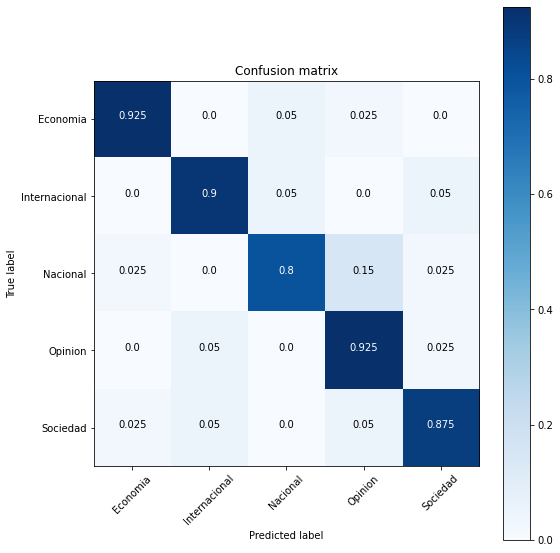

In [49]:
# predicción sobre el conjunto de test
y_predicted = tfidf_clf_lr.predict(X_test)

# reporte de clasificación
class_report = classification_report(y_test, y_predicted) 
print(class_report)

# gráficar matriz de confución
cm = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cm, [*tfidf_clf_lr.classes_], normalize=True) 

In [50]:
import pickle

#Guardar modelo
with open('tfidf_clf_lr.pkl', 'wb') as f:
    pickle.dump(tfidf_clf_lr, f)

#Cargar clasficador
with open('tfidf_clf_lr.pkl', 'rb') as f:
    tfidf_clf_lr = pickle.load(f)
    
tfidf_clf_lr

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function tokenizer at 0x7f59132a4b00>)),
                ('clf',
                 LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg'))])

# B. Topic Modelling

## B.1 Introducción

Los modelos de tópicos probabilísticos nos ayudan a descubrir los temas latentes (*clusters*) en una colección de documentos, como estos temas están conectados unos a otros y cómo cambian en el tiempo. Permiten resumir un gran colección de documentos a través de sus temas y organizarlos entorno a estos.

Los modelos probabilísticos tratan un tópico como una distribución de probabilidad discreta sobre el vocabulario del corpus, siendo un práctica habitual interpretar un tópico a partir de sus $N$ palabras más probables. Por ejemplo, para $N=5$ las palabras más probables de un tópico son: "llaves", "domicilio", "individuos", "casa" y "porton", por lo que una etiqueta valida para este tópico podría ser **"portonazo"**.

## B.2 Latent Dirichlet Allocation

**Disclaimer**: Esta sección puede ser matemáticamente compleja. El detalle matemático se puede omitir. Basta con solo tener una idea de cómo funciona, como cuál es el input, el output y el proceso generativo.

En Latent Dirichlet Allocation (LDA) (Blei, 2003) cada tópico es una distribución de probabilidad sobre un vocabulario fijo $V$. Cada documento $d$ tiene su propia mezcla de tópicos $\pi_{d}$. La asignación $z_{d,n}\in\{1, \ldots, K\}$  de de una palabra $n$ a un tópico $z$ es dibujada a partir de $\pi_{d}$. 


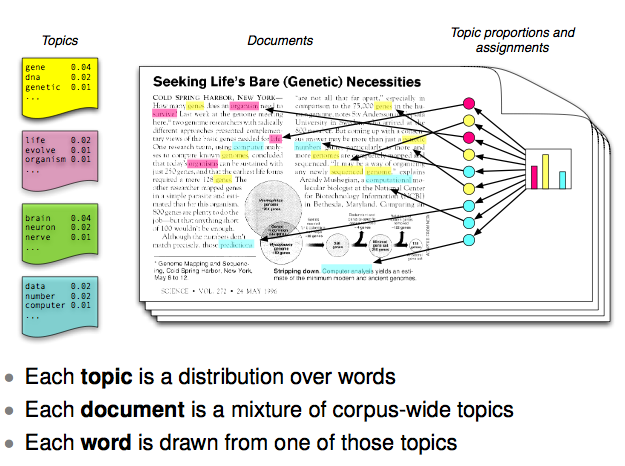




El modelo completo es como sigue

\begin{align}
    \phi_{k}|\eta \quad & \sim\quad \text{Dir}(\frac{\eta}{|V|}1_{|V|})\\
    \pi_{d}|\alpha \quad & \sim \quad \text{Dir}(\frac{\alpha}{K}1_{K})\\
    z_{d,n}|\pi_{d} \quad & \sim \quad \text{Cat}(\pi_{d})\\
    w_{d,n}|z_{d,n}, \phi_{1:K} \quad & \sim \quad \text{Cat}(\phi_{z_{d,n}})
\end{align}

La probabilidad conjunta del modelo:
\begin{equation}
    p(\phi, \pi, z, w|\alpha, \eta)= \prod_{k=1}^{K}p(\phi_{k}|\eta)\prod_{d=1}^{D}p(\pi_{d}|\alpha)\prod_{n=1}^{N_{d}}p(z_{n,d}|\pi_{d})p(w_{d,n}|\phi_{1:K}, z_{d,n})
\end{equation}

La distribución a posterior:
\begin{equation}
    p(\phi, \pi, z|w, \alpha, \eta) = \frac{p(\phi, \pi, z, w|\alpha, \eta)}{p(w|\alpha, \eta)}
\end{equation}

La distribución posterior es computacionalmente intratable para inferencia exacta, debido a que para normalizar la distribución debemos marginalizar sobre todas las variables ocultas y escribir la constante de normalización en términos de los parámetros del modelo. Para poder computar la posterior es necesario utilizar algoritmos de inferencia aproximada, donde el enfoque habitual es Markov Chain Monte Carlo (MCMC) e Inferencia Variacional (VI).



Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.

In [ ]:
# !pip install pyLDAvis==2.1.2

In [52]:
#Topic modeling
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

In [63]:
corpus = [tokenizer(doc, stopwords_remove=True) for doc in df.content]
corpus[1][:5]

['mil', 'hogares', 'comunas', 'puente', 'alto']

In [64]:
corpus = [tokenizer(doc, stopwords_remove=True) for doc in df.content]

dictionary = Dictionary(corpus)

corpus = [dictionary.doc2bow(doc) for doc in corpus]
corpus[1][:5]

[(37, 1), (45, 1), (48, 1), (133, 2), (134, 1)]

In [53]:
# tokenizar los documentos
corpus = [tokenizer(doc, stopwords_remove=True) for doc in df.content]

# diccionario que mapea las palabras del vocabulario con una id  
dictionary = Dictionary(corpus)

# representación númerica del corpus como una lista de tuplas.
# el primer elemento de la tupla es la id de la palabra y el segundo es su frecuencia de aparición en el texto.
corpus = [dictionary.doc2bow(doc) for doc in corpus]

In [ ]:
#entrenamos lda en el corpus
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary, 
                     num_topics=3, 
                     alpha='auto', 
                     eta='auto', 
                     random_state=0) 

In [71]:
# mostrar las topn palabras más probables de un tópico
lda_model.show_topic(topicid=1, topn=10)

[('años', 0.0039763),
 ('bío', 0.0023655714),
 ('gobierno', 0.0023490724),
 ('personas', 0.0021748266),
 ('año', 0.0020733888),
 ('país', 0.0020224159),
 ('empresa', 0.0019647991),
 ('unidos', 0.0019624203),
 ('ley', 0.0019319475),
 ('presidente', 0.0019206271)]

In [70]:
# mezcla de tópicos de cada documento
lda_model.get_document_topics(corpus[5])

[(0, 0.025077699), (1, 0.9617462), (2, 0.013176075)]

In [73]:
lda_vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
                                  corpus=corpus, 
                                  dictionary=dictionary, 
                                  sort_topics=True, 
                                  R=30, 
                                  mds='mmds')
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)
